In [1]:
import glob
import os

import pandas as pd
import scipy.io

import numpy as np

In [2]:
cwruMeta = pd.read_excel('Original Data/CWRU/CWRU Mapping.xlsx')
recordedFileNames = cwruMeta["fileName"].to_list()

filePaths = glob.glob("Original Data/CWRU/*.mat")
fileNames = [os.path.basename(filePath) for filePath in filePaths]

recordedFileNames.sort() == fileNames.sort()

True

In [3]:
def getRPM(fileName, path):
    
    fileNumber = fileName.split(".")[0]
    fileNumber = fileNumber.zfill(3)
    
    key = "X" + fileNumber + "RPM"
    
    matDict = scipy.io.loadmat(path + fileName)
    
    if key in matDict.keys():
        nestedRPM = matDict[key]
        rpm = nestedRPM[0][0]
    else:
        rpm = np.nan
    
    return rpm
    
    
def getTimeSeries(fileName, path, key):
    
    fileNumber = fileName.split(".")[0]
    fileNumber = fileNumber.zfill(3)
    
    key = "X" + fileNumber + key
    
    matDict = scipy.io.loadmat(path + fileName)
    
    if key in matDict.keys():
        nestedTimeSeries = matDict[key]
        timeSeries = nestedTimeSeries.flatten()
    else:
        timeSeries = np.nan
    
    return timeSeries

In [4]:
cwruData = cwruMeta.copy()

cwruData = cwruData.assign(rpm = cwruData["fileName"].apply(lambda fileName: getRPM(fileName, "Original Data/CWRU/")))

cwruData = cwruData.assign(cwruData = cwruData["fileName"].apply(lambda fileName: getTimeSeries(fileName, "Original Data/CWRU/", "_FE_time")))
cwruData = cwruData.assign(baseData = cwruData["fileName"].apply(lambda fileName: getTimeSeries(fileName, "Original Data/CWRU/", "_BA_time")))
cwruData = cwruData.assign(driveEndData = cwruData["fileName"].apply(lambda fileName: getTimeSeries(fileName, "Original Data/CWRU/", "_DE_time")))

cwruData.head(10)

,condition,faultyBearingPosition,sampleRate,motorLoad,faultDiameter,relativeFaultPosition,fileName,rpm,cwruData,baseData,driveEndData
0,Normal Baseline,NaN,12000,0,NaN,NaN,97.mat,1796.0,"[0.14566727272727273, 0.09779636363636364, 0.0...",NaN,"[0.05319692307692307, 0.08866153846153846, 0.0..."
1,Normal Baseline,NaN,12000,1,NaN,NaN,98.mat,NaN,"[0.023216363636363632, 0.08115454545454545, 0....",NaN,"[0.046104, -0.03713353846153846, -0.0894959999..."
2,Normal Baseline,NaN,12000,2,NaN,NaN,99.mat,NaN,"[0.038625454545454546, 0.0967690909090909, 0.1...",NaN,"[0.06425353846153846, 0.06300184615384616, -0...."
3,Normal Baseline,NaN,12000,3,NaN,NaN,100.mat,1725.0,"[0.19292181818181817, 0.16436363636363635, 0.0...",NaN,"[0.014603076923076923, 0.05444861538461539, 0...."
4,Inner Race Fault,drive end,12000,0,0.007,NaN,105.mat,1797.0,"[-0.40207454545454546, -0.004725454545454545, ...","[0.06466148367952523, -0.023096261127596444, -...","[-0.08300435129740519, -0.19573433133732535, 0..."
5,Inner Race Fault,drive end,12000,1,0.007,NaN,106.mat,1772.0,"[0.040885454545454544, 0.06985454545454545, 0....","[0.07922741839762612, 0.0071622551928783385, -...","[-0.2776016367265469, -0.04434479041916167, 0...."
6,Inner Race Fault,drive end,12000,2,0.007,NaN,107.mat,1748.0,"[-0.029174545454545453, -0.18634727272727272, ...","[0.0488079525222552, 0.05291216617210683, -0.0...","[-0.09323776447105789, 0.18728770459081834, 0...."
7,Inner Race Fault,drive end,12000,3,0.007,NaN,108.mat,1721.0,"[-0.09738545454545454, -0.1808, -0.23360181818...","[0.07741673590504453, -0.0024142433234421367, ...","[0.2226985628742515, 0.09323776447105789, -0.1..."
8,Inner Race Fault,drive end,12000,0,0.014,NaN,169.mat,1796.0,"[0.1103290909090909, -0.18963454545454544, 0.1...","[-0.055447121661721076, -0.035046765578635015,...","[-0.22383560878243514, -0.20954131736526946, 0..."
9,Inner Race Fault,drive end,12000,1,0.014,NaN,170.mat,1774.0,"[0.11977999999999998, 0.04930909090909091, -0....","[0.002454480712166172, 0.013962373887240358, 0...","[-0.04044634730538922, 0.003736007984031936, 0..."


In [5]:
normal = cwruData[(cwruData['condition'] == "Normal Baseline") & (cwruData['motorLoad'] == 2) & (cwruData['sampleRate'] == 12000)]['driveEndData'].iloc[0]

innerFault = cwruData[(cwruData['condition'] == "Inner Race Fault") & (cwruData['faultyBearingPosition'] == "drive end") & (cwruData['motorLoad'] == 2) & (cwruData['sampleRate'] == 12000)]['driveEndData'].iloc[0]

ballFault = cwruData[(cwruData['condition'] == "Ball Fault") & (cwruData['faultyBearingPosition'] == "drive end") & (cwruData['motorLoad'] == 2) & (cwruData['sampleRate'] == 12000)]['driveEndData'].iloc[0]

outerFault = cwruData[(cwruData['condition'] == "Outer Race Fault") & (cwruData['faultyBearingPosition'] == "drive end") & (cwruData['motorLoad'] == 2) & (cwruData['sampleRate'] == 12000)]['driveEndData'].iloc[0]

In [6]:
cwruData

,condition,faultyBearingPosition,sampleRate,motorLoad,faultDiameter,relativeFaultPosition,fileName,rpm,cwruData,baseData,driveEndData
0,Normal Baseline,NaN,12000,0,NaN,NaN,97.mat,1796.0,"[0.14566727272727273, 0.09779636363636364, 0.0...",NaN,"[0.05319692307692307, 0.08866153846153846, 0.0..."
1,Normal Baseline,NaN,12000,1,NaN,NaN,98.mat,NaN,"[0.023216363636363632, 0.08115454545454545, 0....",NaN,"[0.046104, -0.03713353846153846, -0.0894959999..."
2,Normal Baseline,NaN,12000,2,NaN,NaN,99.mat,NaN,"[0.038625454545454546, 0.0967690909090909, 0.1...",NaN,"[0.06425353846153846, 0.06300184615384616, -0...."
3,Normal Baseline,NaN,12000,3,NaN,NaN,100.mat,1725.0,"[0.19292181818181817, 0.16436363636363635, 0.0...",NaN,"[0.014603076923076923, 0.05444861538461539, 0...."
4,Inner Race Fault,drive end,12000,0,0.007,NaN,105.mat,1797.0,"[-0.40207454545454546, -0.004725454545454545, ...","[0.06466148367952523, -0.023096261127596444, -...","[-0.08300435129740519, -0.19573433133732535, 0..."
...,...,...,...,...,...,...,...,...,...,...,...
156,Outer Race Fault,fan end,12000,3,0.021,orthogonal,318.mat,1728.0,"[-0.11007844155844157, -0.11284259740259742, 0...","[-0.2252891394658754, 0.06554670623145402, 0.1...","[0.09551185628742516, -0.00462940119760479, -0..."
157,Outer Race Fault,fan end,12000,0,0.007,opposite,302.mat,1797.0,"[0.028528831168831172, 0.08485498501498502, -0...","[0.06458100890207716, 0.10614623145400594, -0....","[-0.1521643113772455, -0.18667329341317365, -0..."
158,Outer Race Fault,fan end,12000,1,0.007,opposite,305.mat,1775.0,"[0.135281038961039, -0.06715272727272728, -0.0...","[0.06055727002967359, 0.10550243323442138, -0....","[0.08625305389221556, 0.0497051497005988, 0.03..."
159,Outer Race Fault,fan end,12000,2,0.007,opposite,306.mat,1755.0,"[0.16519896103896106, -0.1920275324675325, 0.0...","[0.08433756676557864, -0.1955537091988131, 0.0...","[0.11435433133732535, -0.05295385229540918, -0..."


In [7]:
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.gridspec as gridspec

In [8]:
np.arange(0, 12000 * 1/12000, 1/12000)

array([0.00000000e+00, 8.33333333e-05, 1.66666667e-04, ...,
       9.99750000e-01, 9.99833333e-01, 9.99916667e-01])

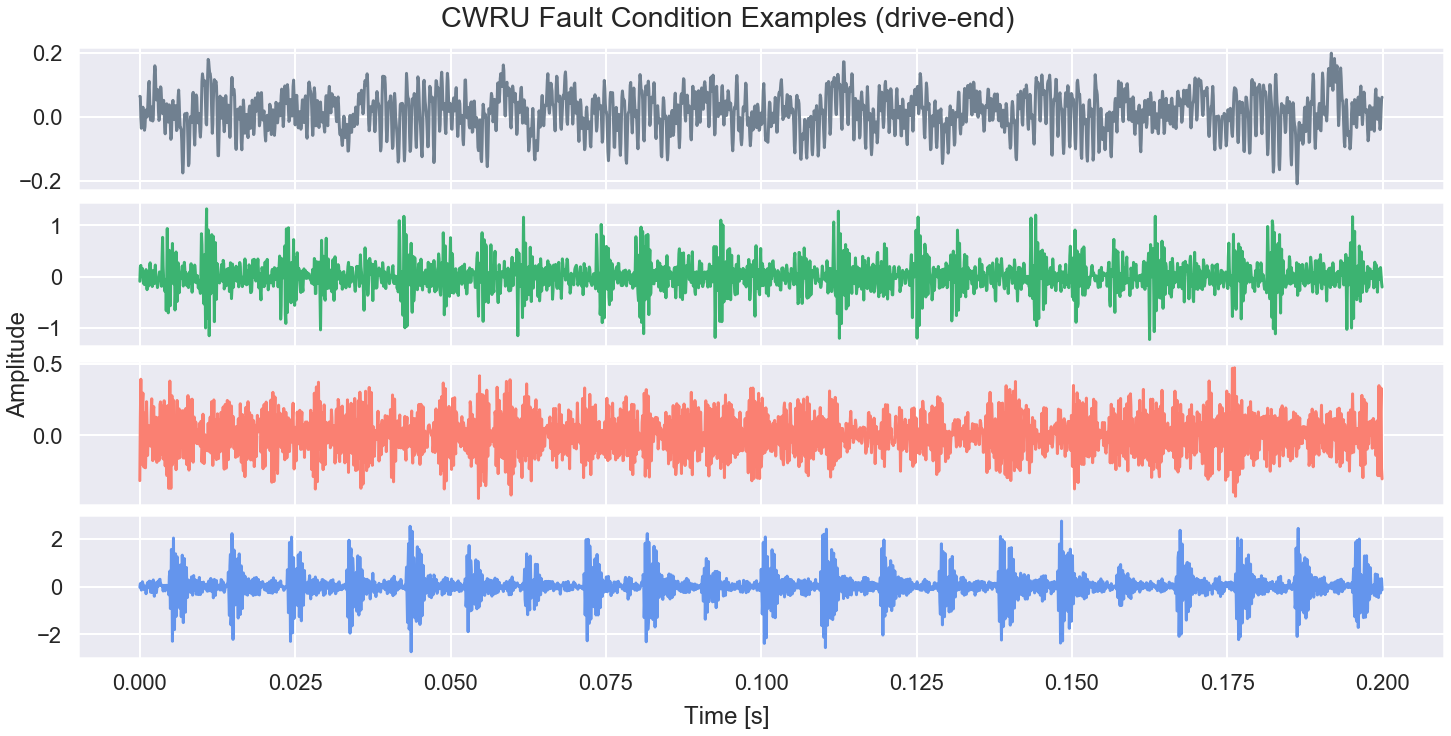

In [31]:
sns.set(rc={'figure.figsize':(20, 10)})
#sns.set_style("whitegrid")
sns.set_context('poster')


conditionFigure = pyplot.figure(constrained_layout=True)
cfSpec = gridspec.GridSpec(ncols=1, nrows=4, figure=conditionFigure)
conditionFigureAxis0 = conditionFigure.add_subplot(cfSpec[0, 0])
conditionFigureAxis1 = conditionFigure.add_subplot(cfSpec[1, 0])
conditionFigureAxis2 = conditionFigure.add_subplot(cfSpec[2, 0])
conditionFigureAxis3 = conditionFigure.add_subplot(cfSpec[3, 0])

#pyplot.xlabel('Time [s]')
#pyplot.ylabel('Amplitude')

seconds = .2
sampleRate = 12000

amountDatapoints = int(seconds * sampleRate)
time = np.arange(0, seconds, 1/sampleRate)

p0 = sns.lineplot(time, normal[:amountDatapoints], color="slategrey", ax = conditionFigureAxis0)
p0.set(xticklabels=[]) 

p1 = sns.lineplot(time, innerFault[:amountDatapoints], color="mediumseagreen", ax = conditionFigureAxis1)
p1.set(xticklabels=[]) 

p2 = sns.lineplot(time, ballFault[:amountDatapoints], color="salmon", ax = conditionFigureAxis2)
p2.set(xticklabels=[]) 

sns.lineplot(time, outerFault[:amountDatapoints], color="cornflowerblue", ax = conditionFigureAxis3);

conditionFigureAxis3.set_xlabel('.', color=(0, 0, 0, 0))
conditionFigureAxis3.set_ylabel('.', color=(0, 0, 0, 0))

conditionFigure.text(0.5, 0, 'Time [s]', ha='center')
conditionFigure.text(0, 0.5, 'Amplitude', va='center', rotation='vertical')
conditionFigure.suptitle("CWRU Fault Condition Examples (drive-end)");

conditionFigure.savefig('fault_conditions.png', dpi=300)